# 🌫️ DELHI AQI APPROXIMATION PREDICTION

## Import Librarires

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [19]:
df = pd.read_csv("delhi-weather-aqi-2025.csv")

In [20]:
print(df.shape)

(52560, 16)


In [21]:
df.head()

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,description,aqi_index,pm2_5,pm10,co,no2
0,01/01/2025,0:00,Anand Vihar,28.6469,77.316,8.1,100,995.4,2.9,Mainly clear,WMO Code 1,197,185.8,188.6,1907,56.7
1,01/01/2025,1:00,Anand Vihar,28.6469,77.316,7.7,100,994.7,3.2,Overcast,WMO Code 3,198,174.6,177.4,1669,44.8
2,01/01/2025,2:00,Anand Vihar,28.6469,77.316,7.5,100,994.3,4.5,Overcast,WMO Code 3,199,164.4,166.7,1493,34.6
3,01/01/2025,3:00,Anand Vihar,28.6469,77.316,7.8,99,994.1,6.0,Overcast,WMO Code 3,200,156.5,158.8,1401,26.7
4,01/01/2025,4:00,Anand Vihar,28.6469,77.316,7.3,100,993.8,6.8,Overcast,WMO Code 3,200,149.5,151.8,1372,20.6


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date_ist        52560 non-null  object 
 1   time_ist        52560 non-null  object 
 2   location        52560 non-null  object 
 3   lat             52560 non-null  float64
 4   lon             52560 non-null  float64
 5   temp_c          52560 non-null  float64
 6   humidity        52560 non-null  int64  
 7   pressure_mb     52560 non-null  float64
 8   windspeed_kph   52560 non-null  float64
 9   condition_text  52560 non-null  object 
 10  description     52560 non-null  object 
 11  aqi_index       52560 non-null  int64  
 12  pm2_5           52560 non-null  float64
 13  pm10            52560 non-null  float64
 14  co              52560 non-null  int64  
 15  no2             52560 non-null  float64
dtypes: float64(8), int64(3), object(5)
memory usage: 6.4+ MB


## EDA

In [23]:
df.describe()

,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,aqi_index,pm2_5,pm10,co,no2
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,28.608850,77.174567,25.024406,62.285940,983.162635,6.565820,287.364212,89.542432,300.462700,863.844273,35.442757
std,0.058927,0.096519,7.618231,23.454666,6.688582,3.478066,327.979524,55.363812,412.782899,600.845140,28.978905
min,28.527300,77.049400,5.700000,5.000000,966.100000,0.000000,56.000000,6.000000,6.100000,146.000000,1.700000
25%,28.556200,77.100000,19.500000,44.000000,977.500000,4.000000,152.000000,51.100000,80.600000,464.000000,14.900000
50%,28.609300,77.160100,26.500000,65.000000,983.400000,6.000000,170.000000,76.400000,151.800000,664.000000,26.900000
75%,28.646900,77.261800,30.500000,82.000000,988.900000,8.700000,238.000000,110.400000,325.000000,1078.000000,47.100000
max,28.704100,77.316000,43.800000,100.000000,998.800000,27.100000,2742.000000,443.300000,3263.400000,7432.000000,220.100000


In [24]:
df.isnull().sum()

date_ist          0
time_ist          0
location          0
lat               0
lon               0
temp_c            0
humidity          0
pressure_mb       0
windspeed_kph     0
condition_text    0
description       0
aqi_index         0
pm2_5             0
pm10              0
co                0
no2               0
dtype: int64

In [25]:
## Feature Selection

df_model = df[[
    "temp_c", "humidity", "pressure_mb", "windspeed_kph",
    "pm2_5", "pm10", "co", "no2",
    "aqi_index"
]]

df_model.head()

,temp_c,humidity,pressure_mb,windspeed_kph,pm2_5,pm10,co,no2,aqi_index
0,8.1,100,995.4,2.9,185.8,188.6,1907,56.7,197
1,7.7,100,994.7,3.2,174.6,177.4,1669,44.8,198
2,7.5,100,994.3,4.5,164.4,166.7,1493,34.6,199
3,7.8,99,994.1,6.0,156.5,158.8,1401,26.7,200
4,7.3,100,993.8,6.8,149.5,151.8,1372,20.6,200


In [26]:
df_model.describe()

,temp_c,humidity,pressure_mb,windspeed_kph,pm2_5,pm10,co,no2,aqi_index
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,25.024406,62.285940,983.162635,6.565820,89.542432,300.462700,863.844273,35.442757,287.364212
std,7.618231,23.454666,6.688582,3.478066,55.363812,412.782899,600.845140,28.978905,327.979524
min,5.700000,5.000000,966.100000,0.000000,6.000000,6.100000,146.000000,1.700000,56.000000
25%,19.500000,44.000000,977.500000,4.000000,51.100000,80.600000,464.000000,14.900000,152.000000
50%,26.500000,65.000000,983.400000,6.000000,76.400000,151.800000,664.000000,26.900000,170.000000
75%,30.500000,82.000000,988.900000,8.700000,110.400000,325.000000,1078.000000,47.100000,238.000000
max,43.800000,100.000000,998.800000,27.100000,443.300000,3263.400000,7432.000000,220.100000,2742.000000


In [27]:
# Check Duplicates
print("Before:", df_model.shape)
df_model = df_model.drop_duplicates()
print("After:", df_model.shape)

Before: (52560, 9)
After: (52560, 9)


In [28]:
# Limiting outliers with 99% and 1% value 
df_clean = df_model.copy()

for col in df_clean.columns:
    lower = df_clean[col].quantile(0.01)   # 1%
    upper = df_clean[col].quantile(0.99)   # 99%
    
    df_clean[col] = df_clean[col].clip(lower, upper)

df_clean.describe()

,temp_c,humidity,pressure_mb,windspeed_kph,pm2_5,pm10,co,no2,aqi_index
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,25.021427,62.306374,983.163683,6.549935,89.236199,296.556267,857.774784,35.243425,283.857534
std,7.580106,23.374291,6.650892,3.415334,53.854532,391.224263,569.188348,28.126183,307.282920
min,8.700000,11.000000,970.200000,0.600000,18.000000,19.600000,228.000000,3.600000,72.000000
25%,19.500000,44.000000,977.500000,4.000000,51.100000,80.600000,464.000000,14.900000,152.000000
50%,26.500000,65.000000,983.400000,6.000000,76.400000,151.800000,664.000000,26.900000,170.000000
75%,30.500000,82.000000,988.900000,8.700000,110.400000,325.000000,1078.000000,47.100000,238.000000
max,40.700000,99.000000,995.300000,16.000000,285.000000,2183.000000,3050.410000,133.900000,1834.000000


## AQI Distribution Graph

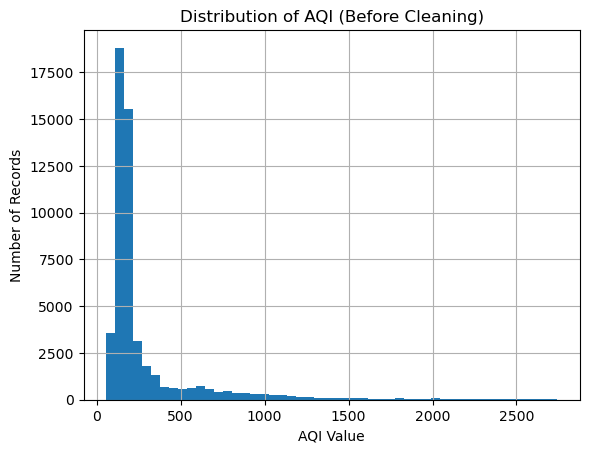

In [29]:
plt.figure()
df_model["aqi_index"].hist(bins=50)
plt.title("Distribution of AQI (Before Cleaning)")
plt.xlabel("AQI Value")
plt.ylabel("Number of Records")
plt.show()

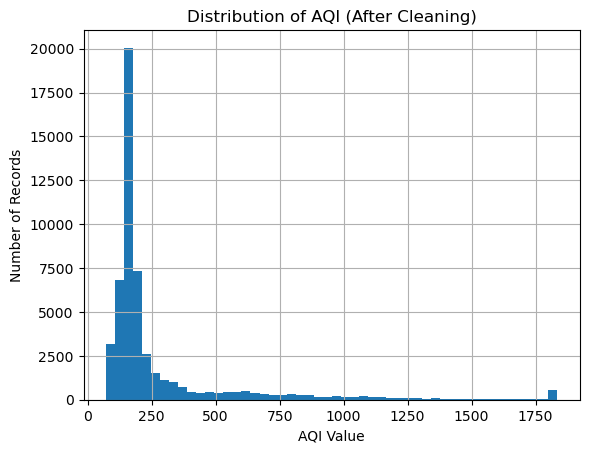

In [30]:
plt.figure()
df_clean["aqi_index"].hist(bins=50)
plt.title("Distribution of AQI (After Cleaning)")
plt.xlabel("AQI Value")
plt.ylabel("Number of Records")
plt.show()

## PM2.5 vs AQI GRAPH

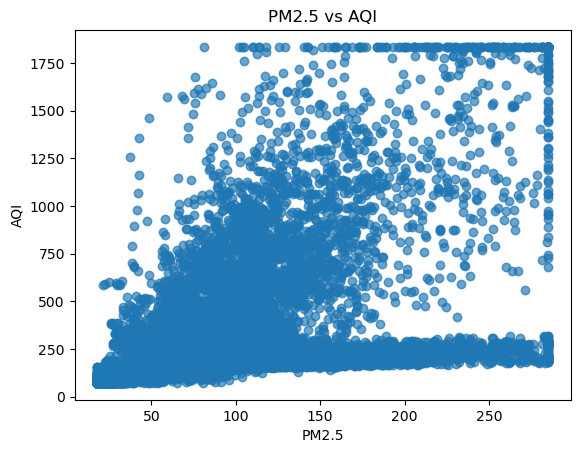

In [31]:
plt.figure()
plt.scatter(df_clean["pm2_5"], df_clean["aqi_index"], alpha=0.3)
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("PM2.5 vs AQI")
plt.show()

## Wind Speed vs AQI GRAPH

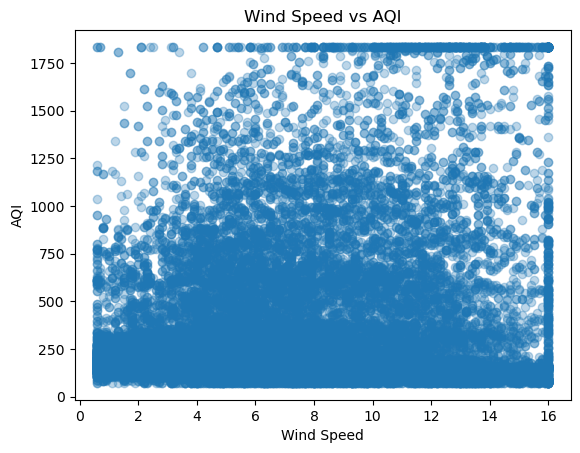

In [32]:
plt.figure()
plt.scatter(df_clean["windspeed_kph"], df_clean["aqi_index"], alpha=0.3)
plt.xlabel("Wind Speed")
plt.ylabel("AQI")
plt.title("Wind Speed vs AQI")
plt.show()

## Temperature vs AQI

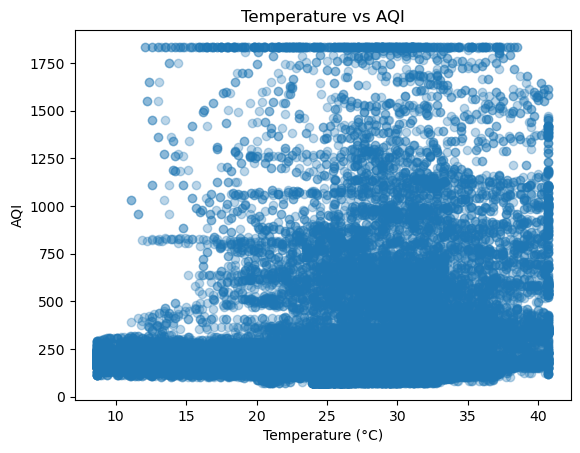

In [33]:
plt.figure()
plt.scatter(df_clean["temp_c"], df_clean["aqi_index"], alpha=0.3)
plt.xlabel("Temperature (°C)")
plt.ylabel("AQI")
plt.title("Temperature vs AQI")
plt.show()

## Humidity vs AQI

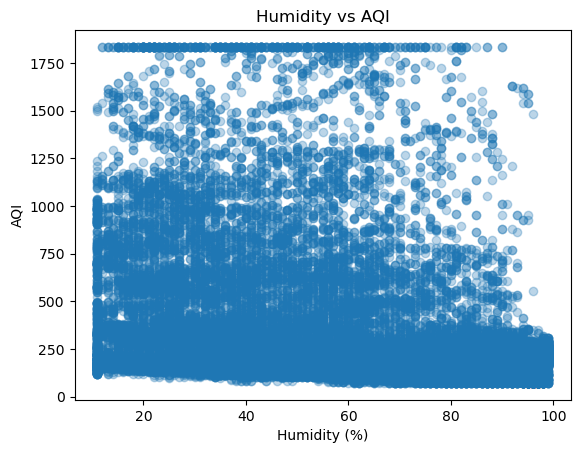

In [37]:
plt.figure()
plt.scatter(df_clean["humidity"], df_clean["aqi_index"], alpha=0.3)
plt.xlabel("Humidity (%)")
plt.ylabel("AQI")
plt.title("Humidity vs AQI")
plt.show()

## Pressure vs AQI

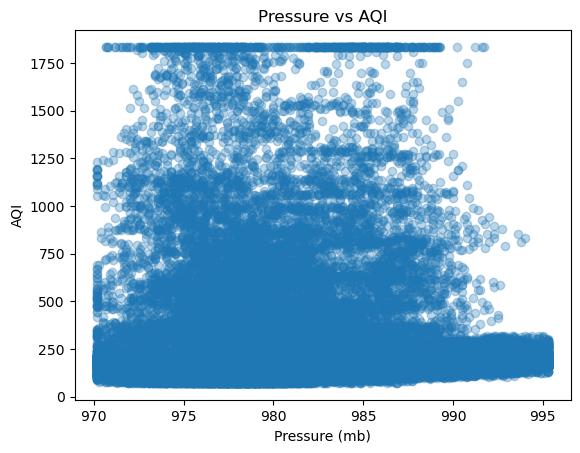

In [36]:
plt.figure()
plt.scatter(df_clean["pressure_mb"], df_clean["aqi_index"], alpha=0.3)
plt.xlabel("Pressure (mb)")
plt.ylabel("AQI")
plt.title("Pressure vs AQI")
plt.show()

## Pre-Processing

In [40]:
features = [
    "temp_c", "humidity", "pressure_mb", "windspeed_kph",
    "pm2_5", "pm10", "co", "no2"
]

target = "aqi_index"

X = df_clean[features]
y = df_clean[target]

print(X.shape, y.shape)

(52560, 8) (52560,)


In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


## Train-Test Split

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(42048, 8) (10512, 8)


## Model Selection

In [50]:
# ================================
# KNN Regressor
# ================================

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("KNN Results")
print("R2:", r2_score(y_test, y_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_knn)))

KNN Results
R2: 0.8752418983351757
MAE: 45.01002663622527
RMSE: 107.96272270516207


In [44]:
# ================================
# Decision Tree Regressor
# ================================

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(
    max_depth=15,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Results")
print("R2:", r2_score(y_test, y_pred_dt))
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree Results
R2: 0.833425805830145
MAE: 47.1791086048951
RMSE: 124.75079157961444


In [45]:
# ================================
# Random Forest Regressor
# ================================

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("\nRandom Forest Results")
print("R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Results
R2: 0.9184982250564228
MAE: 38.46791476407915
RMSE: 87.26156206180109


In [46]:
# ================================
# Support Vector Regressor (SVR)
# ================================

from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

svr = SVR(
    kernel="rbf",
    C=100,        # regularization strength
    gamma="scale",
    epsilon=0.1
)

svr.fit(X_train, y_train)


SVR(C=100)

In [47]:
y_pred_svr = svr.predict(X_test)

print("SVR Results")
print("R2:", r2_score(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_svr)))


SVR Results
R2: 0.7540872535877079
MAE: 66.55640868290675
RMSE: 151.57583508971905


## Final Model Selection among [KNN, DECISION TREE, RANDOM FOREST, SVR]

In [52]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred1 = rf.predict(X_test)

In [53]:
print("\nRandom Forest Results")
print("R2:", r2_score(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest Results
R2: 0.9184982250564228
MAE: 38.46791476407915
RMSE: 87.26156206180109


## Feature Importance

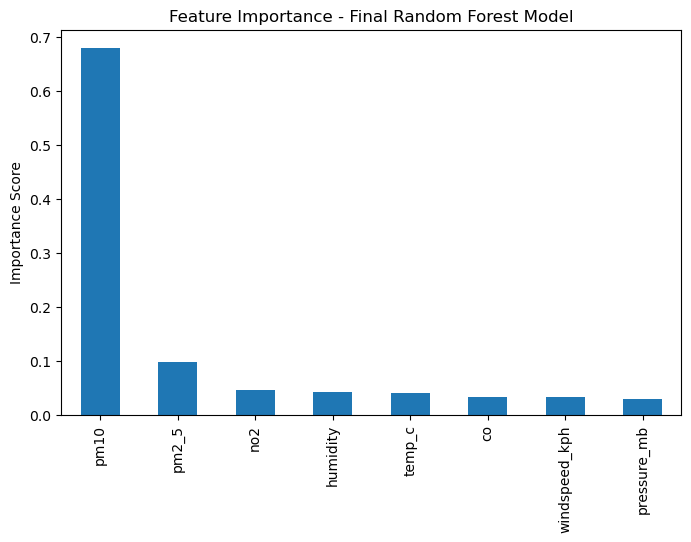

pm10             0.678571
pm2_5            0.098167
no2              0.045975
humidity         0.042521
temp_c           0.040204
co               0.033156
windspeed_kph    0.032583
pressure_mb      0.028822
dtype: float64

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_imp.plot(kind="bar")
plt.title("Feature Importance - Final Random Forest Model")
plt.ylabel("Importance Score")
plt.show()

feat_imp

## Save the Model

In [55]:
import joblib

joblib.dump(rf, "delhi_aqi_rf_final_model.pkl")
print("Final model saved!")

Final model saved!


In [56]:
#Saving Scaler for KNN/SVR
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved!")

Scaler saved!


In [57]:
#Model Loading

loaded_model = joblib.load("delhi_aqi_rf_final_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

sample = X.iloc[:5]   # raw features
sample_scaled = loaded_scaler.transform(sample)

pred = loaded_model.predict(sample_scaled)

print("Predictions:", pred)
print("Actual:", y.iloc[:5].values)

Predictions: [202.555 199.6   200.06  200.545 198.57 ]
Actual: [197 198 199 200 200]
